In [1]:
# <!-- collapse=True -->
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Descente du gradient

## Terrain de jeu

Avec des splines 2D  
[doc RectBivariateSpline](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.RectBivariateSpline.html#scipy.interpolate.RectBivariateSpline)

In [422]:
from scipy.interpolate import RectBivariateSpline

In [423]:
Xi = np.linspace(0, 1, 5)

In [424]:
mXi, mYi = np.meshgrid( Xi, Xi )
mZi = np.ones_like( mXi )

In [425]:
mZi = np.ones_like( mXi )
mZi

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [426]:
# Construction du terrain : 
mZi = np.array([[ .4,  .4,  .7,  .7,  .8],
               [ .4,  .2,  .3,  .4,  .9],
               [ .4,  .1,  .8,  .6,  .9],
               [ .4,  .0,  1.,  .7,  1.],
               [ .5,  .5,  .9,  .8,  1.]])

In [457]:
# fonction d'interpolation
terrain = RectBivariateSpline(Xi, Xi, mZi.T )

### Plot

In [456]:
Xplot = np.linspace(0, 1, 89)
mXplot, mYplot = np.meshgrid( Xplot, Xplot )

Zplot = terrain.ev( mXplot.flatten() , mYplot.flatten() ).reshape((len(Xplot), len(Xplot)))

# Tentative d'ajouter des ombres...
dZ = terrain.ev( mXplot.flatten() , mYplot.flatten() , dx=1, dy=0).reshape((len(Xplot), len(Xplot)))

In [437]:
from matplotlib import cm

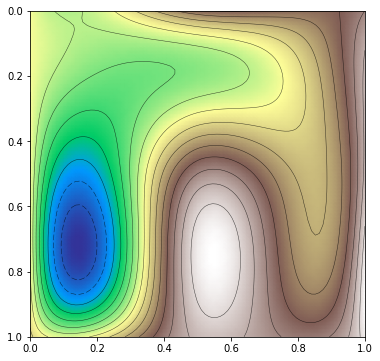

In [454]:
plt.figure(figsize=(6, 6))
plt.contour( Xplot, Xplot, Zplot, 20, linewidths = 0.5, colors = 'k', antialiased=True, alpha=.7)
#plt.plot( mXi.flatten(), mYi.flatten(), 'xw'  )

plt.pcolormesh(Xplot, Xplot, Zplot, cmap=cm.terrain , shading='gouraud')
#plt.pcolormesh(Xplot, Xplot, dZ, cmap=cm.gist_gray, alpha=0.2, edgecolors=None ) 

plt.gca().invert_yaxis()
plt.xlim([0, 1]);

il n'y a pas à priori de minimium local...

## Descente du gradient

In [414]:
from scipy.optimize import fmin

In [415]:
def onestep( x, y ):
    
    # Gradient
    dx = terrain.ev(x, y, dx=1, dy=0)
    dy = terrain.ev(x, y, dx=0, dy=1)
    
    # Linesearch
    fscan = lambda  t :  terrain.ev(x -dx*t, y -dy*t )
    res = fmin( fscan, 0.01, disp=0 )
    
    tmin =  res[0]
    return  x -dx*tmin, y -dy*tmin

In [416]:
onestep( .8, .6 )

(0.85308853600000012, 0.58937790133333334)

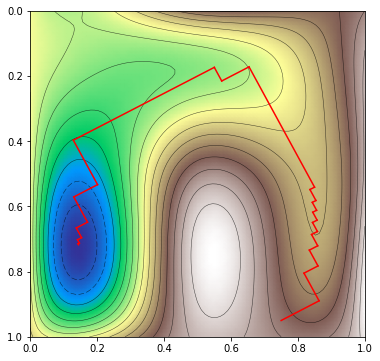

In [461]:
plt.figure(figsize=(6, 6))

plt.pcolormesh(Xplot, Xplot, Zplot, cmap=cm.terrain , shading='gouraud')
plt.contour( Xplot, Xplot, Zplot, 20, linewidths = 0.5, colors = 'k', antialiased=True, alpha=.7)

x0, y0 = .75, .95
    
# itérations: 
for k in range(28):
    x, y = onestep( x0, y0 )
    plt.plot( [x0, x], [y0, y], 'r' )
    x0, y0 = x, y
    
plt.gca().invert_yaxis()
plt.xlim([0, 1]);